In [1]:
import seaborn as sns
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table

## Read tables

In [2]:
SPUDS_cat=Table.read('./data/dmu26_XID+MIPS_XMM-LSS_SPUDS_cat.fits')

In [3]:
SPUDS_cat[0:10]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J021748.384-055853.332,34.4515999475648,-5.9814811582976155,305.31146,323.17114,287.40622,-0.007987332,5.0641715e-06,1.0000608,1343.0,0.0
HELP_J021747.552-055909.435,34.4481319475648,-5.985954158297615,61.64442,83.24991,39.762577,-0.007987332,5.0641715e-06,1.0007377,1146.0,0.0
HELP_J021751.319-055843.666,34.4638289475648,-5.978796158297614,40.07564,60.321735,21.23005,-0.011716769,5.1117663e-06,0.99953556,2000.0,0.0
HELP_J021751.808-055827.121,34.465864947564796,-5.974200158297615,14.507545,27.912325,4.470504,-0.011716769,5.1117663e-06,1.0026258,2000.0,0.0
HELP_J021752.105-055836.873,34.4671040222776,-5.97690909477323,329.24072,347.7774,309.96005,-0.011716769,5.1117663e-06,nan,2000.0,0.0
HELP_J021756.415-055812.803,34.4850609475648,-5.970223158297616,68.94973,96.15068,39.50831,-0.011716769,5.1117663e-06,1.0022622,865.0,0.0
HELP_J021755.590-055800.544,34.4816249822776,-5.96681790477323,256.0221,272.37762,240.00948,-0.011716769,5.1117663e-06,nan,2000.0,0.0
HELP_J021754.691-055807.994,34.4778793322776,-5.96888729477323,87.04866,103.543526,70.45882,-0.011716769,5.1117663e-06,1.0004507,2000.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

6.992063


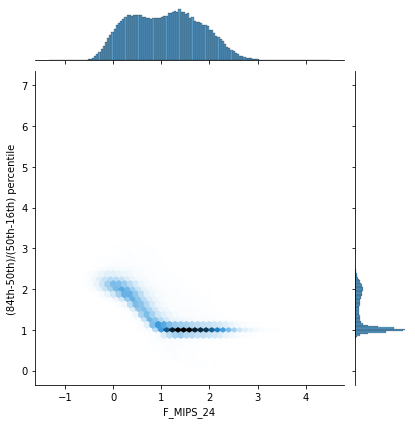

In [4]:
import seaborn as sns 
skew=(SPUDS_cat['FErr_MIPS_24_u']-SPUDS_cat['F_MIPS_24'])/(SPUDS_cat['F_MIPS_24']-SPUDS_cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 7
#g=sns.jointplot(x=np.log10(SWIRE_SPUDS_cat['F_MIPS_24']),y=skew, kind='hex')
#print(np.max(skew))

g=sns.jointplot(x=np.log10(SPUDS_cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))


g.savefig('../../data/figs/sk_MIPS_XMM-LSS_SPUDS.pdf', bbox='tight')
g.savefig('../../data/figs/sk_MIPS_XMM-LSS_SPUDS.png', bbox='tight')

Both seem to have flux pdfs that become Gaussian at ~10$\mathrm{\mu Jy}$ 

## Add flag to catalogue

In [5]:
from astropy.table import Column
SPUDS_cat.add_column(Column(np.zeros(len(SPUDS_cat), dtype=bool),name='flag_mips_24'))


In [6]:
ind_SPUDS=(SPUDS_cat['Pval_res_24']>0.5) | (SPUDS_cat['F_MIPS_24'] < 10.0)

In [7]:
SPUDS_cat['flag_mips_24'][ind_SPUDS]=True


In [8]:
SPUDS_cat.write('./data/dmu26_XID+MIPS_XMM-LSS_SPUDS_cat_20181210.fits', format='fits',overwrite=True)